# Linear_Discriminant_Analysis -Classification

C:\Users\15016\AppData\Local\Temp\ipykernel_54672\3481690175.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


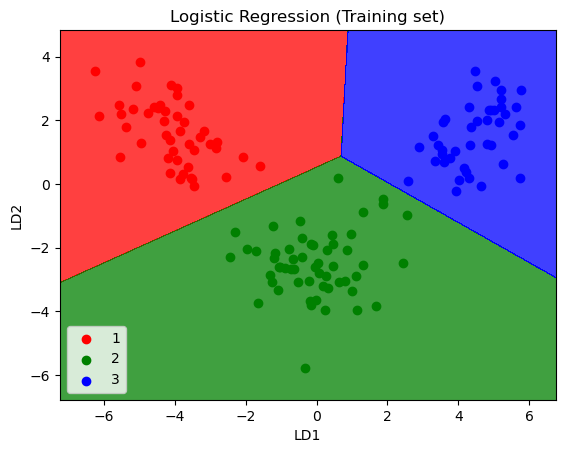

C:\Users\15016\AppData\Local\Temp\ipykernel_54672\3481690175.py:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


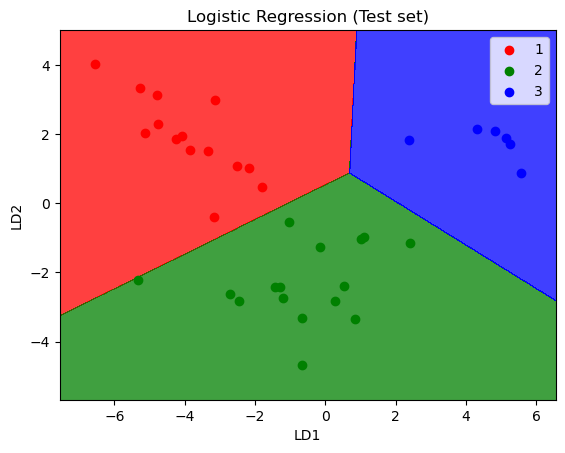

In [1]:
# LDA

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [8]:
# Import Modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import time
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [9]:
   
# Standard Scaler Function    
def split_scalar(indep_X,dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)    
    return X_train, X_test, y_train, y_test
    
# Accuracy Score prediction 
def cm_prediction(classifier,X_test):
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import classification_report 
    #from sklearn.metrics import confusion_matrix
    #cm = confusion_matrix(y_test, y_pred)
    
    Accuracy=accuracy_score(y_test, y_pred )
    
    report=classification_report(y_test, y_pred)
    return  classifier,Accuracy,report,X_test,y_test,cm

#LogisticRegression model
def logistic(X_train,y_train,X_test):       
    # Fitting K-NN to the Training set
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm      
    
#svm_linear model    
def svm_linear(X_train,y_train,X_test):
                
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

#svm_nonlinear model    
def svm_NL(X_train,y_train,X_test):
                
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

# Navie model
def Navie(X_train,y_train,X_test):       
    # Fitting K-NN to the Training set
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm         
    
# knn model    
def knn(X_train,y_train,X_test):
           
    # Fitting K-NN to the Training set
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm

# Decision Tree model
def Decision(X_train,y_train,X_test):
        
    # Fitting K-NN to the Training set
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm      

# Random forest model
def random(X_train,y_train,X_test):
        
    # Fitting K-NN to the Training set
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
    return  classifier,Accuracy,report,X_test,y_test,cm
    
#table for compare model  
def selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    # Create the DataFrame with proper column names
    dataframe = pd.DataFrame(
        index=['LDA'],
        columns=['Logistic', 'SVMl', 'SVMnl', 'KNN', 'Naive', 'DecisionTree', 'RandomForest']
    )

    # Fill values for each row
    for number, idx in enumerate(dataframe.index):      
        dataframe.at[idx, 'Logistic'] = acclog[number]       
        dataframe.at[idx, 'SVMl'] = accsvml[number]
        dataframe.at[idx, 'SVMnl'] = accsvmnl[number]
        dataframe.at[idx, 'KNN'] = accknn[number]
        dataframe.at[idx, 'Naive'] = accnav[number]
        dataframe.at[idx, 'DecisionTree'] = accdes[number]
        dataframe.at[idx, 'RandomForest'] = accrf[number]

    return dataframe

In [14]:
# Load dataset
dataset=pd.read_csv("Wine.csv",index_col=None)

# Copy dataset to df2
df2=dataset

#make lableing using one hot lable
df2 = pd.get_dummies(df2, drop_first=True).astype(int)

#split independent X (all features) , Y dependent
indep_X=dataset.iloc[:, 0:13].values
dep_Y=dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)



#print(kbest)
acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

#X_train, X_test, y_train, y_test=split_scalar(kbest,dep_Y)   
            
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

result


,Logistic,SVMl,SVMnl,KNN,Naive,DecisionTree,RandomForest
LDA,1.0,0.972222,1.0,0.972222,0.972222,0.972222,1.0


In [12]:
# PCA=2
result

,Logistic,SVMl,SVMnl,KNN,Naive,DecisionTree,RandomForest
LDA,1.0,0.972222,1.0,0.972222,0.972222,0.972222,1.0
